In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [11]:
df=pd.read_csv('/home/chintan/Class_Code/Class8 Regression/housingdata.csv')
data=df.values
print df.head()
print data.shape
x, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print x.shape, y.shape, cof
x=x.reshape(500,)
print x.shape

   0.00632   18  2.31  0  0.538  6.575  65.2    4.09  1  296  15.3   396.9  \
0  0.02731  0.0  7.07  0  0.469  6.421  78.9  4.9671  2  242  17.8  396.90   
1  0.02729  0.0  7.07  0  0.469  7.185  61.1  4.9671  2  242  17.8  392.83   
2  0.03237  0.0  2.18  0  0.458  6.998  45.8  6.0622  3  222  18.7  394.63   
3  0.06905  0.0  2.18  0  0.458  7.147  54.2  6.0622  3  222  18.7  396.90   
4  0.02985  0.0  2.18  0  0.458  6.430  58.7  6.0622  3  222  18.7  394.12   

   4.98    24  
0  9.14  21.6  
1  4.03  34.7  
2  2.94  33.4  
3  5.33  36.2  
4  5.21  28.7  
(505, 14)
(500, 1) (500,) 92.72605452244687
(500,)


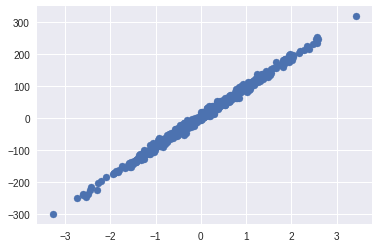

In [12]:
#a=np.random.rand(100)
#b=np.random.rand(100)
plt.figure(0)
#a=[1,2,3]
#b=[10,20,30]
#plt.xlim(-200,200)
#plt.ylim(-200,200)
#plt.scatter(a,b)
#plt.plot(a,b)
#plt.scatter(file[:,0],file[:,1])
plt.scatter(x[:],y[:])
plt.show()

(400,) (100,)
(400,) (100,)


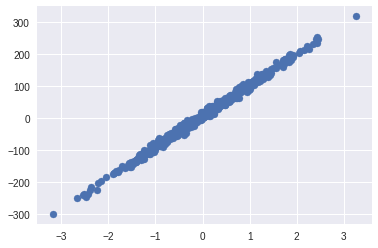

In [13]:
#Normalization Step To make mean -0 and std =1(scaling factor)
x=(x-x.mean())/(x.std())
plt.scatter(x,y)

split = int(0.8 * x.shape[0])

x_train = x[:split]
x_test = x[split:]

y_train = y[:split]
y_test = y[split:]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape


# Algorithm Liniear Regression

1). Generate dataset plot the graph btw X,y and Normalization the daata (optional) <br>
2). Calculate hypothesis (Eq of line) to make best line that fits such points<br>
3). Calculate the error function and try to minimize the error <br>
4). Calculate the differntial function of total error wrt theta0 and theta1<br>
5). Calculate gradient of error in orer to minimize the error <br>
5). Basically shift w=w-etta(learning rate)df/dtheta<br>


In [14]:
def hypothesis(theta,x):
    return theta[0]+ theta[1]*x
    
def error(X,Y,theta):
    total_error=0
    m=X.shape[0]
    
    for i in range(m):
        total_error+= (Y[i]-hypothesis(theta,X[i]))**2
    total_error/=m
    return 0.5*total_error


def gradient(Y,X,theta):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    
    for i in range(m):
        grad[0] += -1*(Y[i]-hypothesis(theta,X[i])) #Y is original and second one yHat
        grad[1] += -1*(Y[i]-hypothesis(theta,X[i]))*X[i]
    
    return grad/m  # Divide by m does not effect on error but t will effect on grad and we must divide my m (no of values) for mbest results because on dividing by m it will take small steps and definately reach a local minima
        
    

def gradient_Descent(X,Y,learning_rate,maxItr):
    
    grad= np.array([0.0,0.0])
    theta= np.array([0.0,0.0])
    e=[]
    
    for i in range(maxItr):
        ce=error(X,Y,theta)
        e.append(ce)
        grad=gradient(Y,X,theta) #basically it computes the value of grad[x,y] from above functions 
        print theta
    
        theta[0]=theta[0] - learning_rate*grad[0] #now here for next step (think parabola upr hill se bottom pe aane ke liye bascially tum ek step move kr rhe ho for next iteration theta values updates
        theta[1]=theta[1] - learning_rate*grad[1]
    
    return theta,e


    
    
    
    
        
        

In [15]:
print x_train.shape,y_train.shape
theta,e= gradient_Descent(x_train,y_train,learning_rate=0.01,maxItr=300)
print theta[0],theta[1]

(400,) (400,)
[0. 0.]
[0.05912894 0.96554744]
[0.11786276 1.92144624]
[0.17620346 2.86779285]
[0.23415303 3.80468277]
[0.29171345 4.73221054]
[0.34888672 5.65046976]
[0.40567483 6.55955306]
[0.46207976 7.4595522 ]
[0.5181035  8.35055797]
[0.57374803 9.23266029]
[ 0.62901534 10.10594816]
[ 0.68390741 10.97050969]
[ 0.73842621 11.82643212]
[ 0.79257373 12.67380181]
[ 0.84635194 13.51270426]
[ 0.89976281 14.3432241 ]
[ 0.95280831 15.16544515]
[ 1.00549041 15.97945035]
[ 1.05781108 16.78532183]
[ 1.10977228 17.58314091]
[ 1.16137596 18.37298807]
[ 1.21262408 19.154943  ]
[ 1.26351859 19.92908461]
[ 1.31406145 20.69549098]
[ 1.36425459 21.45423945]
[ 1.41409996 22.20540655]
[ 1.4635995  22.94906809]
[ 1.51275513 23.68529907]
[ 1.5615688  24.41417378]
[ 1.61004241 25.13576576]
[ 1.6581779  25.85014778]
[ 1.70597718 26.55739194]
[ 1.75344216 27.25756957]
[ 1.80057475 27.95075131]
[ 1.84737686 28.63700709]
[ 1.89385037 29.31640614]
[ 1.93999718 29.98901699]
[ 1.98581919 30.65490751]
[ 2.031318

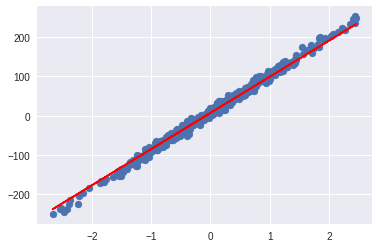

In [16]:
plt.scatter(x_train,y_train)
plt.plot(x_train,hypothesis(theta,x_train),color='red') #basically it plots a graph btw Xtest and predicted value of X from hypothesis on  y 
plt.show()

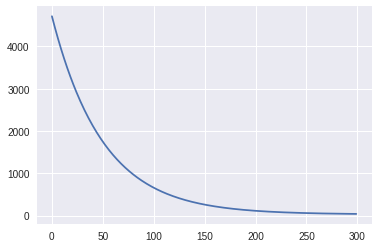

In [17]:
plt.figure(1)
plt.plot(e)
plt.show()
#print e[50]
#print e[90]